In [ ]:
import pandas as pd
import random
import dask



In [ ]:
datos = pd.read_csv("/content/sample_data/CUADROS.csv")
df = pd.DataFrame(datos)


In [ ]:
@dask.delayed
def cuadro2(buscar):
  valor = ["0","1","10","11","12","13","14","15","16","17","18","19","2",
  "20","21","22","23","24","25","26","27","28","29","3","30","31","32","33","34","35","36",
  "37","38","39","4","5","6","7","8","9",
  "A","B","C","D","E","F","G","H","I",
  "J","K","L","M","N","O","P","Q","R",
  "S","T","U","V","W","X","Y","Z"]
  cuadro2l=["1","2","B","C","D","E","F","G","H","I","J","K","3","L",
  "M","N","P","Q","R","S","T","U","V","4","W","X","Y","Z","","","",
  "","","","5","6","7","8","9","A","","","","","","","","","","","","","","","",
  "","","","","","","","","","",""]
  long = len(valor)
  i=0
  for i in range(long):
      if valor[i] ==buscar: 
        regreso = (cuadro2l[i])
  return regreso

In [ ]:
@dask.delayed
def cve_pais(buscar):
  NombrePais=["Emiratos Árabes Unidos","Argentina (República)","Canadá","Chile (República de)",
  "Costa Rica (República de)","Cuba (República de)","Cuba (República de)","Alemania(República Federal de)","Dinamarca (Reino de)",
  "República Dominicana","Ecuador (República del)",
  "Egipto (República Árabe de)","España (Reino de)","Francia (República Francesa)",
  "Corea (República de) (Corea del Sur)","Marruecos (Reino de)",
  "México (Estados Unidos Mexicanos)","Rusia (Federación Rusa)","Turquía (República de)","Estados Unidos de America","Uruguay (República Oriental del)"]
  pais=["AE","AR","CA","CL","CR","CU","CU",
  "DE","DK","DO","EC","EG","ES","FR",
  "KR","MA","MX","RU","TR","US","UY"]
  long = len(NombrePais)
  i=0
  regreso=""
  for i in range(long):
      if int(str(NombrePais[i]).find(buscar))>-1:
          regreso = (pais[i])
  return regreso

Parametros

In [ ]:
Nombre = 'IRIS IVETTE'
Ap_Paterno = 'GUERRA'
Ap_Materno = 'HINOJOSA'
Fecha_Nac = '07/09/81'
Pais_Nac = 'Chile'

LIBRERIA DASK, TIME, PROGRESS BAR PARA MEDIR EL TIEMPO 


In [ ]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time
from datetime import datetime 
from datetime import date

Primer funcion: Clave por Nombre


In [ ]:
@dask.delayed
def Clave_Nombre(NombreP, Ap_PaternoP, Ap_MaternoP):
  time.sleep(random.random())
  if Ap_MaternoP != '' and Ap_PaternoP != '' :
    nombrecuatro = Ap_PaternoP[:2] + Ap_MaternoP[:1] + NombreP[:1]
  if Ap_MaternoP == '' and Ap_PaternoP != '' :
    nombrecuatro = Ap_PaternoP[:2] +  NombreP[:2]
  if Ap_MaternoP != '' and Ap_PaternoP == '' :
    nombrecuatro = Ap_MaternoP[:2] +  NombreP[:2]
  nombrecuatro= nombrecuatro   
  return nombrecuatro

Segunda funcion: Clave por Fecha Nacimiento

In [ ]:
@dask.delayed
def clave_Nacimiento(objDate):
  time.sleep(random.random())
  strDate = objDate
  objDate = datetime.strptime(strDate, '%m/%d/%y')
  clave = datetime.strftime(objDate,'%Y')[2:]+str(datetime.strftime(objDate,'%m'))+str(datetime.strftime(objDate,'%d'))
 
  return clave   

Tercera estructura para obtener distincion homonomia

In [ ]:
@dask.delayed
def NC(NombreP, Ap_PaternoP, Ap_MaternoP):
  time.sleep(random.random())
  NombreP = NombreP.replace(" ","")
  if Ap_MaternoP != '' and Ap_PaternoP != '' :
    nombrecuatro = NombreP + Ap_PaternoP   
  if Ap_MaternoP == '' and Ap_PaternoP != '' :
    nombrecuatro = NombreP + Ap_PaternoP
  if Ap_MaternoP != '' and Ap_PaternoP == '' :
    nombrecuatro = NombreP + Ap_MaternoP
  return nombrecuatro

In [ ]:

@dask.delayed
def NumeroHomonomia(NombreSalida):
  time.sleep(random.random())
  from pandas.core.groupby.generic import MultiIndex
  from pandas.core.arrays.arrow import array
  notas = list()
  notas = tuple(NombreSalida)
  Multi= list()
  valor2 = 1
  i=0
  indice = list()
  cantidad = len(NombreSalida)
  for nota in notas:
    valores = df[df['valor'] == nota + " "]['cuadro1'] 
    indice.append(valores)
  for i in range(cantidad):
    if i-1 >= 0:
      Multi.append(int(indice[i]) * int(indice[i-1]))
    if i == cantidad-1:
      Multi.append(int(indice[i]) * int(indice[i]))
      Total = sum(Multi)
  return Total

  #return cantidad

In [ ]:
@dask.delayed
def clave_homonomia(Numero):
  time.sleep(random.random())
  longitud= len(str(Numero))
  clave_homo= str(Numero)[longitud - 3:longitud]
  cociente = int(clave_homo)/34
  residuo = int(clave_homo)%34
  homonomia = cuadro2(str(int(cociente)))+ cuadro2(str(int(residuo)))
  return homonomia




Cuarta Estructura por Pais de Origen


In [ ]:
@dask.delayed
def clave_pais(nombrePais):
  time.sleep(random.random())
  pais = cve_pais(nombrePais)
  return pais

Quinta estructura para obtener el identificador generado


In [ ]:
#from re import I
@dask.delayed
def NumeroIdentificador(NombreSalida,Clave_Fecha,Clave_Homonomia,Clave_Pais):
  time.sleep(random.random())
  notas = list()
  mensaje = NombreSalida+ Clave_Fecha + Clave_Homonomia + Clave_Pais
  notas = tuple(mensaje)
  Multi= list()
  valor2 = 1
  i=0
  indice = list()
  cantidad = len(notas)
  Total = 0
  for nota in notas:
    if nota.isnumeric():
      valores = df[df['valor'] == nota + ""]['cuadro3'] 
    else:
      valores = df[df['valor'] == nota + " "]['cuadro3'] 
    indice.append(valores)
  for i in range(cantidad):
    Multi.append(indice[i] * (17-(i+1)))
    Total = int(Multi[i]) + Total
  #for i in range(cantidad):
  #   print(Multi[i] )
  Identificador = Total%11
  if Identificador ==1:
     Identificador ="A"
  if Identificador >>1:
     Identificador = 11 - int(Identificador)
    
  return Identificador

In [ ]:
@dask.delayed
def FinalIdentificador(NombreSalida,Clave_Fecha,Clave_Homonomia,Clave_Pais,NumeroIdentificador):
  time.sleep(random.random())
  return NombreSalida + Clave_Fecha + Clave_Homonomia + Clave_Pais + str(NumeroIdentificador)

In [ ]:
%%time
NombreSalidaV = Clave_Nombre(Nombre,Ap_Paterno, Ap_Materno)
Clave_FechaV = clave_Nacimiento(Fecha_Nac)
NombredeSalida = NC(Nombre,Ap_Paterno, Ap_Materno )
NumeroClave = NumeroHomonomia(NombredeSalida)
Clave_HomonomiaV = clave_homonomia(NumeroClave)
Clave_PaisV = clave_pais(Pais_Nac)
Identificador = NumeroIdentificador(NombreSalidaV,Clave_FechaV,Clave_HomonomiaV,Clave_PaisV)
Identificador_Extranjero = FinalIdentificador(NombreSalidaV,Clave_FechaV,Clave_HomonomiaV,Clave_PaisV,Identificador)
Identificador_Extranjero.visualize()
print(Identificador_Extranjero)


Delayed('FinalIdentificador-608b6c01-075b-4687-8486-ed0ade1067de')
CPU times: user 24.6 ms, sys: 4.08 ms, total: 28.7 ms
Wall time: 370 ms


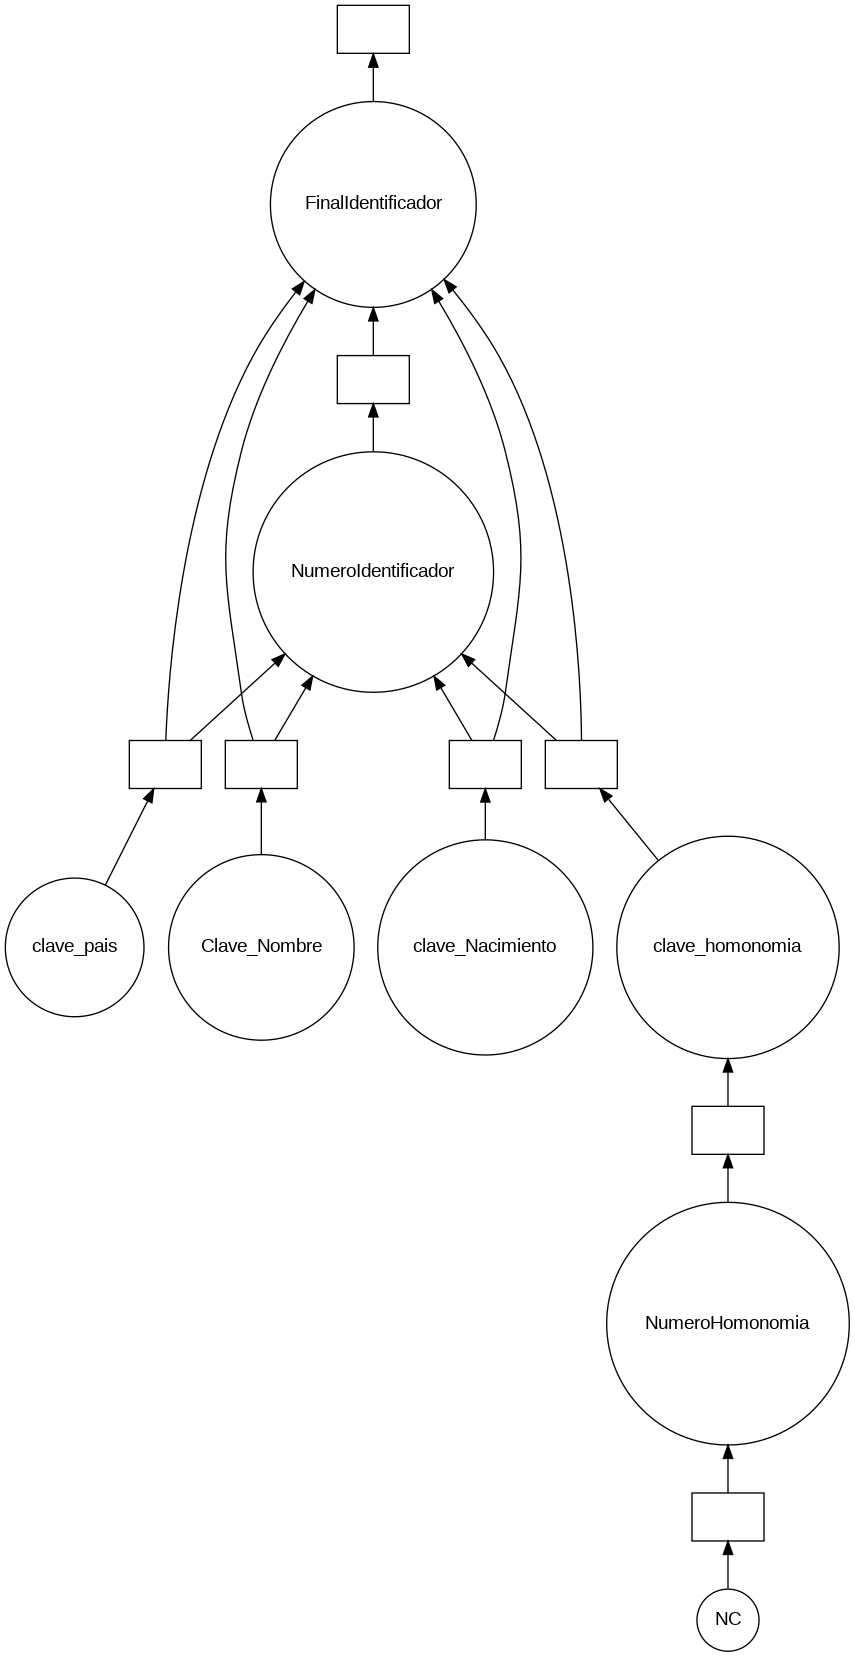

In [ ]:
Identificador_Extranjero.visualize()